# モンテカルロ法の実装<br>
乱数を用いて円周率πの近似値を出してみる<br>
正方形に内接する円の中にある乱数によって生成した点と正方形内の点の比から、円周率πを求める。<br>

式は以下の通りになる。
$$πR^2:4R^2 = n:m$$
$$π = \frac{4n}{m}$$
但しn,mは正方形内に内接する円と正方形内に含まれる点の個数とする。
今回は$\frac{1}{4}$の円で考えてみた（負の数の乱数が出せなかったため）

In [1]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
%matplotlib inline

In [2]:
def get_pi(n):
    get_pi_list = []
    for i in n:
        start = time.time()
        x_list = np.array(np.random.random(i))
        y_list = np.array(np.random.random(i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        cir_point = 0
        for i in range(i):
            if r_list[i] <= 1:
                cir_point += 1
        square_point = i
        pi = 4*cir_point / square_point
    
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {:.6f}sec".format(time.time() - start))
        get_pi_list.append(time.time() - start)
    return get_pi_list

# 結論
10^8くらいのオーダーだと1分ほどかかる。まず間違いなくfor文で回してるからだと思う。

# 修正-revision-

In [3]:
def get_pi2(n):
    #n = int(input())
    get_pi2_list = []
    for i in n:
        start = time.time()
        x_list = np.array(np.random.random(i))
        y_list = np.array(np.random.random(i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        #cir_point = 0
        cir_point = r_list[r_list <= 1]
        square_point = i
        pi = 4 * len(cir_point) / square_point
        
        #print("円内の点の数: ", cir_point)
        #print("円外の点の数: ", square_point)
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {:.6f}sec".format(time.time() - start))
        get_pi2_list.append(time.time() - start)
    return get_pi2_list

# 修正2-revision2-

In [4]:
def get_pi3(n):
    get_pi3_list = []
    for i in n:
        start = time.time()
        x_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=i))
        y_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        r_list = np.where(r_list <= 1, 1, 0)
        cir_point = np.sum(r_list)
        square_point = i
        pi = 4*cir_point / square_point
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {:.6f}sec".format(time.time() - start))
        get_pi3_list.append(time.time() - start)
    return get_pi3_list

In [5]:
n = np.array([100, 1000, 10000, 100000, 1000000, 10000000, 100000000])
print("--------get_pi--------")
get_pi_list = get_pi(n)
print("--------get_pi2--------")
print()
get_pi2_list = get_pi2(n)
print()
print("--------get_pi3--------")
get_pi3_list = get_pi3(n)

--------get_pi--------
近似した円周率(点が99個の時):  3.474747474747475
かかった時間: 0.000262sec
近似した円周率(点が999個の時):  3.1871871871871873
かかった時間: 0.000801sec
近似した円周率(点が9999個の時):  3.1515151515151514
かかった時間: 0.037725sec
近似した円周率(点が99999個の時):  3.1500715007150073
かかった時間: 0.111392sec
近似した円周率(点が999999個の時):  3.1406071406071407
かかった時間: 0.385325sec
近似した円周率(点が9999999個の時):  3.1409387140938714
かかった時間: 3.136953sec
近似した円周率(点が99999999個の時):  3.1419050714190506
かかった時間: 32.717904sec
--------get_pi2--------

近似した円周率(点が100個の時):  3.24
かかった時間: 0.000155sec
近似した円周率(点が1000個の時):  3.132
かかった時間: 0.000286sec
近似した円周率(点が10000個の時):  3.1348
かかった時間: 0.000923sec
近似した円周率(点が100000個の時):  3.14168
かかった時間: 0.002913sec
近似した円周率(点が1000000個の時):  3.141524
かかった時間: 0.040804sec
近似した円周率(点が10000000個の時):  3.141792
かかった時間: 0.419249sec
近似した円周率(点が100000000個の時):  3.14167536
かかった時間: 4.070613sec

--------get_pi3--------
近似した円周率(点が100個の時):  3.24
かかった時間: 0.000232sec
近似した円周率(点が1000個の時):  3.096
かかった時間: 0.000831sec
近似した円周率(点が10000個の時):  3.1692
かかった時間: 0.000566sec
近似し

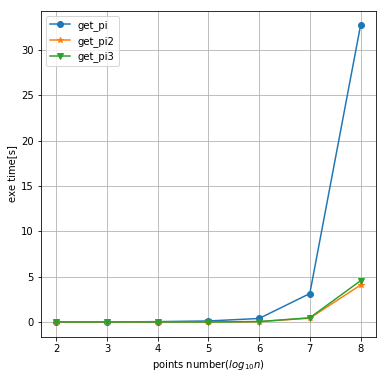

In [6]:
plt.figure(figsize=(6,6))
plt.plot(np.log10(n), np.array(get_pi_list), label="get_pi", marker="o")
plt.plot(np.log10(n), np.array(get_pi2_list), label="get_pi2", marker="*")
plt.plot(np.log10(n), np.array(get_pi3_list), label="get_pi3", marker="v")
plt.xlabel("points number($log_{10}n$)")
plt.ylabel("exe time[s]")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("compare code.png", dpi=400)

In [7]:
def get_pi4(n):
    """
    可視化機能付き関数
    """
    start = time.time()
    x_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=n))
    y_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=n))
    r_list = (x_list**2 + y_list**2) ** 0.5
    r_list = np.where(r_list <= 1, 1, 0)
    cir_point = np.sum(r_list)
    square_point = n
    pi = 4*cir_point / square_point
    print("近似した円周率(点が{}個の時): ".format(n), pi)
    print("かかった時間: {}sec".format(time.time() - start))
    print()
    
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes()
    circle = patches.Circle(xy=(0, 0), radius=1, fill=False, lw=5, edgecolor="b")
    rect = patches.Rectangle(xy=(-1,-1), width=2, height=2, fill=False, lw=5, ec="r")
    ax.add_patch(circle)
    ax.add_patch(rect)
    plt.scatter(x_list, y_list, c="k", s=1)
    plt.show()

近似した円周率(点が100個の時):  3.32
かかった時間: 0.0008678436279296875sec



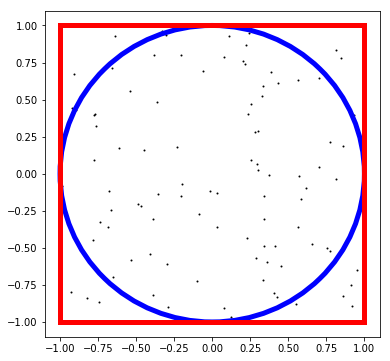

近似した円周率(点が1000個の時):  3.224
かかった時間: 0.0004248619079589844sec



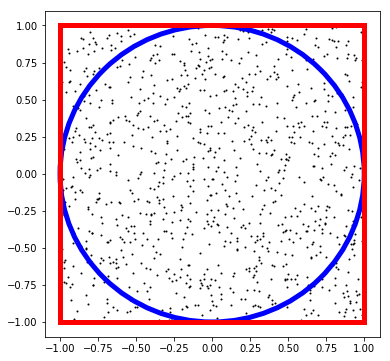

近似した円周率(点が10000個の時):  3.1504
かかった時間: 0.0005924701690673828sec



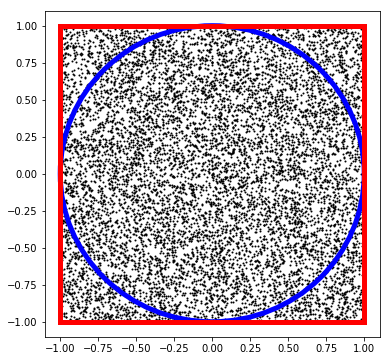

近似した円周率(点が100000個の時):  3.12968
かかった時間: 0.006142377853393555sec



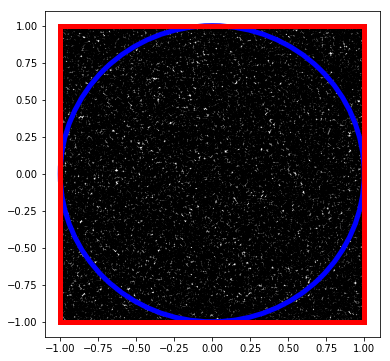

近似した円周率(点が1000000個の時):  3.139996
かかった時間: 0.05787205696105957sec



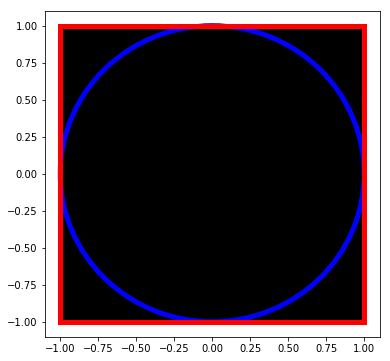

近似した円周率(点が10000000個の時):  3.1413804
かかった時間: 0.4500143527984619sec



In [ ]:
n = [100, 1000, 10000, 100000, 1000000, 10000000]
for i in n:
    get_pi4(i)